# Fuzzy Logic

Celem projektu jest stworzenie systemu wspierającego trenera piłkarskiego w doborze intensywności treningu na podstawie dwóch czynników:

Zmęczenia zawodnika (ocenianego na skali od bardzo niskiego do wysokiego),

Dnia mikrocyklu treningowego (dzień regeneracyjny, treningowy, przedmeczowy).

System ma rekomendować procentową wartość intensywności treningu (od lajtowego do katorżniczego).



Zmęczenie zawodnika zostało dopasowane wzorując się na popularnej skali Borga (skala 1 – 10). Podzielono tę zmienną na 4 zbiory rozmyte: bardzo niskie, niskie, średnie, wysokie. 
Dziedzina dla zmiennej zmęczenie:
- 0 – 4 – bardzo niskie
- 2 – 6.5 – niskie
- 5 – 9 – średnie
- 7.5 – 10 - wysokie



Przyjęliśmy, że nasz mikrocykl treningowy to jednostki treningowe w każdym dniu od poniedziałku do piątku. Zmienną tę podzieliliśmy na 3 zbiory rozmyte: regeneracyjny, treningowy, przedmeczowy.
Dziedzina dla zmiennej dzień mikrocyklu:
- 1 – 2.5 – regeneracyjny
- 2 – 4 – treningowy
- 4 – 5 - przedmeczowy




Jako zmienną wyjściową otrzymamy intensywność treningu wyrażoną w procentach (od 20 – 100). Ustaliliśmy 5 zbiorów rozmytych opisujących tą procentową wartość: lajtowy, lekki, umiarkowany, ciężki, katorżniczy.

Dziedzina dla zmiennej wyjściowej intensywność treningu:
- 20 – 35 – lajtowy
- 30 – 50 – lekki 
- 45 – 65 – umiarkowany
- 60 – 80 – ciężki
- 75 – 100 - katorżniczy


In [66]:
# importy
import pandas as pd
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

## Wybór zmiennych wejściowych, wyjściowych oraz funkcje przynależności

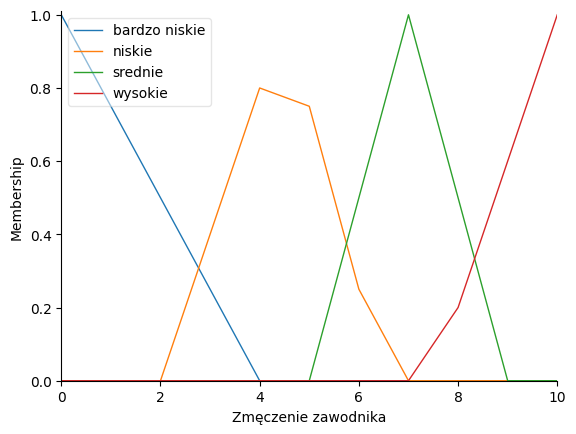

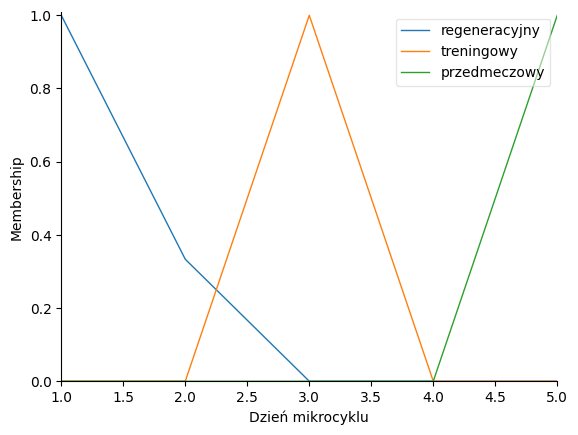

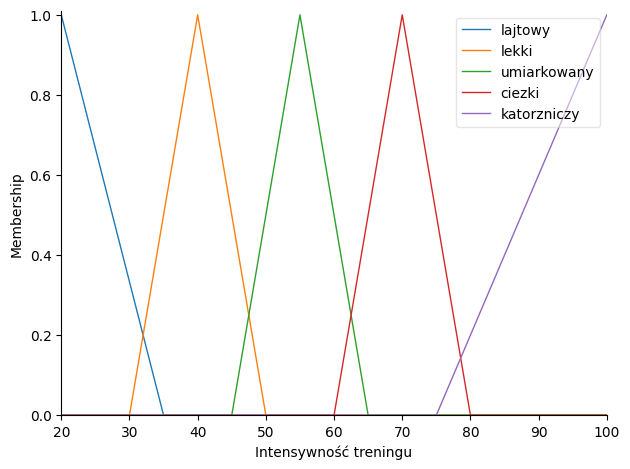

In [67]:
# Wybór zmiennych wejsciowych i wyjsciowych

# Zmęczenie zawodnika
zmeczenie = ctrl.Antecedent(np.arange(0,11,1), "Zmęczenie zawodnika")
# dzien mikrocyklu
dzien = ctrl.Antecedent(np.arange(1,6,1), "Dzień mikrocyklu")

# Intensywnosc treningu 
intensywnosc = ctrl.Consequent(np.arange(20,101,1), "Intensywność treningu")


# Funkcje przynależności
zmeczenie["bardzo niskie"] = fuzz.trimf(zmeczenie.universe, [0, 0, 4])
zmeczenie["niskie"] = fuzz.trimf(zmeczenie.universe, [2, 4.5, 6.5])
zmeczenie["srednie"] = fuzz.trimf(zmeczenie.universe, [5,7,9])
zmeczenie["wysokie"] = fuzz.trimf(zmeczenie.universe, [7.5, 10, 10])


dzien['regeneracyjny'] = fuzz.trimf(dzien.universe, [1, 1, 2.5])
dzien['treningowy'] = fuzz.trimf(dzien.universe, [2, 3, 4])
dzien['przedmeczowy'] = fuzz.trimf(dzien.universe, [4, 5, 5])

intensywnosc['lajtowy'] = fuzz.trimf(intensywnosc.universe, [20, 20, 35])
intensywnosc['lekki'] = fuzz.trimf(intensywnosc.universe, [30, 40, 50])
intensywnosc['umiarkowany'] = fuzz.trimf(intensywnosc.universe, [45,55,65])
intensywnosc['ciezki'] = fuzz.trimf(intensywnosc.universe, [60, 70, 80])
intensywnosc['katorzniczy'] = fuzz.trimf(intensywnosc.universe, [75,100, 100])



zmeczenie.view()
dzien.view()
intensywnosc.view()



plt.tight_layout()
plt.show()

Dla każdej zmiennej zdefiniowano funkcje przynależności w postaci trójkątnych kształtów, które częściowo nachodzą na siebie.
Dzięki temu system uwzględnia stopień przynależności do różnych kategorii (np. zmęczenie na poziomie 3 może należeć zarówno do niskiego, jak i średniego).




## Zdefiniowanie reguł


Kolejnym krokiem było opracowanie bazy reguł IF - THEN, które łączą zmęczenie i dzień mikrocyklu z odpowiednią intensywnością treningu.
Przykład reguły:
If Zmęczenie zawodnika is bardzo niskie and Dzień mikrocyklu is regeneracyjny then Intensywność treningu is ciężki.



In [68]:
rule1 = ctrl.Rule(zmeczenie["bardzo niskie"] & dzien["regeneracyjny"], intensywnosc["ciezki"])
rule2 = ctrl.Rule(zmeczenie["niskie"] & dzien["regeneracyjny"], intensywnosc["umiarkowany"])
rule3 = ctrl.Rule(zmeczenie["srednie"] & dzien["regeneracyjny"], intensywnosc["lekki"])
rule4 = ctrl.Rule(zmeczenie["wysokie"] & dzien["regeneracyjny"], intensywnosc["lajtowy"])
rule5 = ctrl.Rule(zmeczenie["bardzo niskie"] & dzien["treningowy"], intensywnosc["katorzniczy"])
rule6 = ctrl.Rule(zmeczenie["niskie"] & dzien["treningowy"], intensywnosc["katorzniczy"])
rule7 = ctrl.Rule(zmeczenie["srednie"] & dzien["treningowy"], intensywnosc["ciezki"])
rule8 = ctrl.Rule(zmeczenie["wysokie"] & dzien["treningowy"], intensywnosc["umiarkowany"])
rule9 = ctrl.Rule(zmeczenie["bardzo niskie"] & dzien["przedmeczowy"], intensywnosc["umiarkowany"])
rule10 = ctrl.Rule(zmeczenie["niskie"] & dzien["przedmeczowy"], intensywnosc["umiarkowany"])
rule11 = ctrl.Rule(zmeczenie["srednie"] & dzien["przedmeczowy"], intensywnosc["lekki"])
rule12 = ctrl.Rule(zmeczenie["wysokie"] & dzien["przedmeczowy"], intensywnosc["lajtowy"])


system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12] )


## Testowanie dla różnych przykładów

Przykład 1: Zmęczenie na poziomie 4, dzień mikrocyklu 2
Proponowana intensywność treningu: 55.00 %


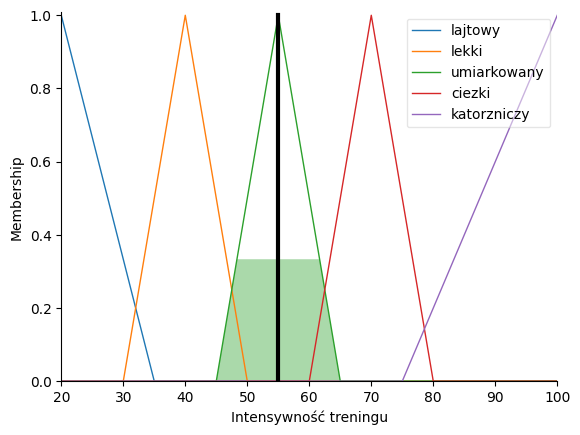

Przykład 2: Zmęczenie na poziomie 8, dzień mikrocyklu 2
Proponowana intensywność treningu: 35.89 %


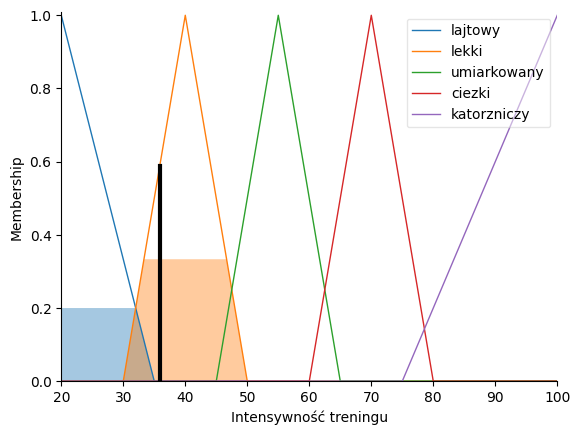

Przykład 3: Zmęczenie na poziomie 2, dzień mikrocyklu 3
Proponowana intensywność treningu: 90.28 %


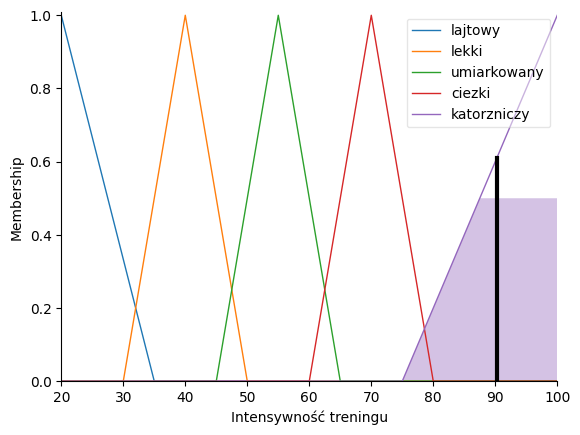

Przykład 4: Zmęczenie na poziomie 7, dzień mikrocyklu 3
Proponowana intensywność treningu: 70.00 %


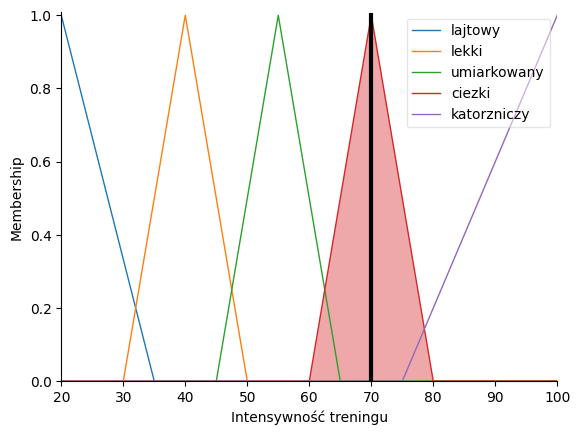

Przykład 5: Zmęczenie na poziomie 1, dzień mikrocyklu 5
Proponowana intensywność treningu: 55.00 %


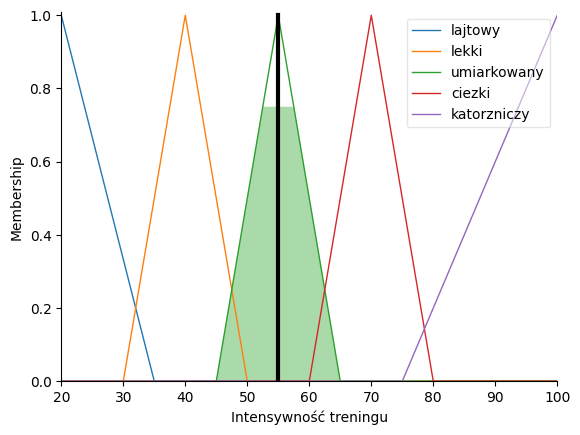

In [ ]:
# Defuzzyfikacja domyślna z biblioteki scikit fuzzy - metoda środka cięzkości

sim = ctrl.ControlSystemSimulation(system)
#### umiarkowane zmęczenie, dzień treningowy
zm1 = sim.input["Zmęczenie zawodnika"] = 4      
dz1 = sim.input["Dzień mikrocyklu"] = 2            
sim.compute()
print(f"Przykład 1: Zmęczenie na poziomie {zm1}, dzień mikrocyklu {dz1}")
print(f'Proponowana intensywność treningu: {sim.output["Intensywność treningu"]:.2f} %')
intensywnosc.view(sim=sim)
plt.show()


#### wysokie zmęczenie i dzien treningowy 
zm2 =sim.input["Zmęczenie zawodnika"] = 8      
dz2 = sim.input["Dzień mikrocyklu"] = 2            
sim.compute()
print(f"Przykład 2: Zmęczenie na poziomie {zm2}, dzień mikrocyklu {dz2}")
print(f'Proponowana intensywność treningu: {sim.output["Intensywność treningu"]:.2f} %')
intensywnosc.view(sim=sim)
plt.show()

####  niskie zmęczenie, dzień regeneracyjny
zm3 =sim.input["Zmęczenie zawodnika"] = 2    
dz3 = sim.input["Dzień mikrocyklu"] = 3            
sim.compute()
print(f"Przykład 3: Zmęczenie na poziomie {zm3}, dzień mikrocyklu {dz3}")
print(f'Proponowana intensywność treningu: {sim.output["Intensywność treningu"]:.2f} %')
intensywnosc.view(sim=sim)
plt.show()

#### wyższe zmęczenie, środek mikrocyklu
zm4 =sim.input["Zmęczenie zawodnika"] = 7      
dz4 = sim.input["Dzień mikrocyklu"] = 3            
sim.compute()
print(f"Przykład 4: Zmęczenie na poziomie {zm4}, dzień mikrocyklu {dz4}")
print(f'Proponowana intensywność treningu: {sim.output["Intensywność treningu"]:.2f} %')
intensywnosc.view(sim=sim)
plt.show()

#### bardzo niskie zmęczenie, dzień przedmeczowy
zm5 =sim.input["Zmęczenie zawodnika"] = 1      
dz5 = sim.input["Dzień mikrocyklu"] = 5            
sim.compute()
print(f"Przykład 5: Zmęczenie na poziomie {zm5}, dzień mikrocyklu {dz5}")
print(f'Proponowana intensywność treningu: {sim.output["Intensywność treningu"]:.2f} %')
intensywnosc.view(sim=sim)
plt.show()



### Wykres przestrzenny

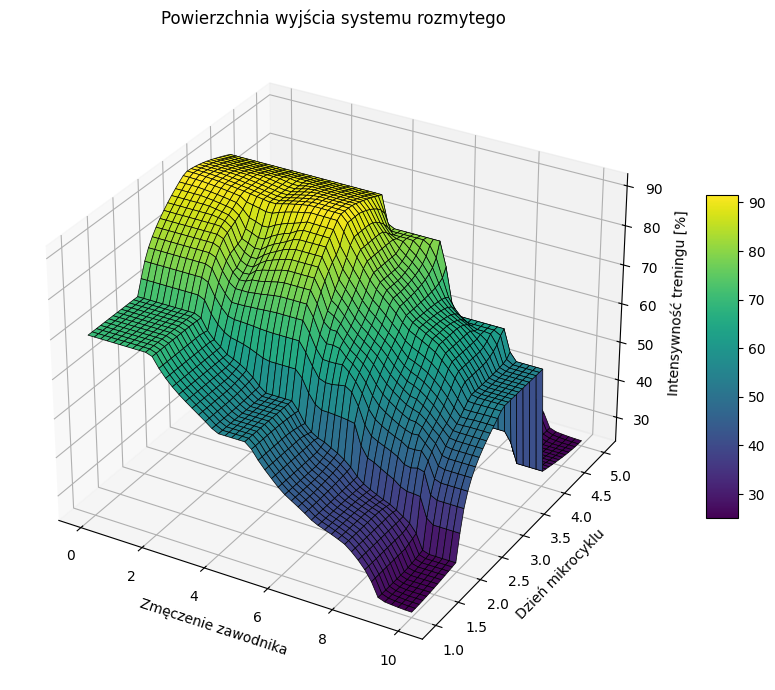

In [70]:

from mpl_toolkits.mplot3d import Axes3D


zm_range = np.linspace(0, 10, 50)
dz_range = np.linspace(1, 5, 50)

Z, D = np.meshgrid(zm_range, dz_range)
I = np.zeros_like(Z)


for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        sim.input["Zmęczenie zawodnika"] = Z[i, j]
        sim.input["Dzień mikrocyklu"] = D[i, j]
        sim.compute()
        I[i, j] = sim.output["Intensywność treningu"]


fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(Z, D, I, cmap="viridis", edgecolor='k', linewidth=0.5)

ax.set_xlabel("Zmęczenie zawodnika")
ax.set_ylabel("Dzień mikrocyklu")
ax.set_zlabel("Intensywność treningu [%]")
ax.set_title("Powierzchnia wyjścia systemu rozmytego")

fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)
plt.tight_layout()
plt.show()


### Wnioski:
- Logika rozmyta pozwala modelować nieprecyzyjne i subiektywne dane, które trudno opisać klasycznymi metodami.
- System można łatwo rozbudować o dodatkowe czynniki (np. pogodę, samopoczucie).
-  Fuzzy logic może dać wsparcie trenerom w podejmowaniu decyzji, co może zmniejszyć ryzyko przetrenowania i kontuzji.
-  Dzięki rozmytym funkcjom przynależności możliwe jest płynne przechodzenie między kategoriami, co odzwierciedla rzeczywiste zjawiska i ludzkie oceny.
-   Systemy oparte na fuzzy logic są intuicyjne i stosunkowo łatwe do implementacji i modyfikacji przez ekspertów dziedzinowych.
